In [62]:
from os import listdir
from os import getcwd
from os.path import isfile, splitext
import numpy as np
import keras
import cv2
from matplotlib.pyplot import imread


def read_data_from_files(
    *fpaths,
):  # read data from all files in the listed directories *fpaths and process the images into (np.array, str) tuples
    cwd = "c:\\Users\\Macabre\\OneDrive\\Työpöytä\\ML_Project_OA\\src\\"
    return (
        (imread(cwd + "{}\\{}".format(dir, fil)), dir)
        for dir in fpaths
        for fil in listdir(cwd + dir)
        if isfile(cwd + "{}\\{}".format(dir, fil))
    )


def preprocess_data(datagenerator, xscale, yscale, grey=True):
    if grey:
        return (
            (inetrpolate(greyscale(feature), xscale, yscale), label)
            for (feature, label) in datagenerator
        )
    else:
        return (
            (inetrpolate(feature, xscale, yscale), label)
            for (feature, label) in datagenerator
        )


def inetrpolate(arr, *scale):
    return cv2.resize(arr, dsize=scale, interpolation=cv2.INTER_CUBIC)


def greyscale(img):  # takes uint8 image tensor
    # The RGB values are converted to grayscale using the NTSC formula: 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue
    # assuming the colors listed in the image tensor img of shape (x,y,3) are in rgb order
    return img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 + img[:, :, 2] * 0.114


def segmented_data(trainingpercent,features, labels):
    assert len(features) == len(labels), "features and labels don't match in length"
    length = len(features)
    permut = np.random.permutation(length) 
    return (
        (features[permut][:int(trainingpercent * length),:], labels[permut] [: int(trainingpercent * length)]),
        (features[permut][int(trainingpercent * length):, :], labels[permut][int(trainingpercent * length) :])
    )


beefile = "Bees"
notbeefile = "Not_Bees"

from PIL import Image

data = read_data_from_files(beefile,notbeefile)
processed_data = preprocess_data(data, 100, 100, True)


In [63]:
features_labels = list(processed_data)

In [64]:
features,labels = zip(*features_labels)

In [88]:
features = np.array(features).astype(np.float32)
labels = np.array ([0 if i == notbeefile else 1 for i in labels]).astype(np.float32)

In [89]:
(train_x,train_y),(test_x,test_y) = segmented_data(0.75,features,labels )

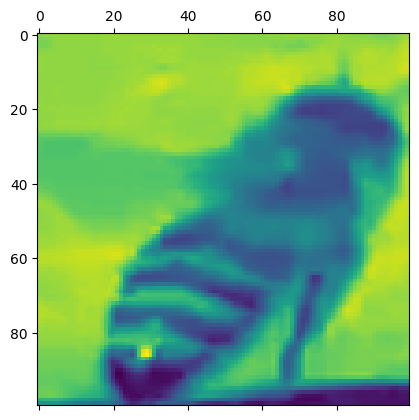

In [90]:
import matplotlib.pyplot as plt
plt.matshow(train_x[2])

In [109]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile (
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [97]:
train_y = np.array([min(x - 1e-5, x) for x in train_y])

In [98]:
train_y[0:5]

array([0.99999, 0.99999, 0.99999, 0.99999, 0.99999])

In [110]:
model.fit(train_x.reshape(len(train_x),100,100,1),train_y, epochs=5)

Epoch 1/5
192/192 [==============================] - 189s 975ms/step - loss: 0.0921 - accuracy: 0.0000e+00
Epoch 2/5
192/192 [==============================] - 162s 843ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/5
130/192 [===================>..........] - ETA: 56s - loss: 0.0000e+00 - accuracy: 0.0000e+00

KeyboardInterrupt: 